In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import statsmodels.formula.api as smf 
from matplotlib import pyplot as plt

In [2]:
vacc = pd.read_csv("vaccinationsdata_uk.csv")
vacc.head()

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,2021-08-13,205999.0,87627380,39047.0,47254399,166952.0,40372981
1,overview,United Kingdom,K02000001,2021-08-12,236943.0,87421381,44384.0,47215352,192559.0,40206029
2,overview,United Kingdom,K02000001,2021-08-11,215329.0,87184438,41568.0,47170968,173761.0,40013470
3,overview,United Kingdom,K02000001,2021-08-10,188654.0,86969109,37511.0,47129400,151143.0,39839709
4,overview,United Kingdom,K02000001,2021-08-09,169278.0,86780455,32250.0,47091889,137028.0,39688566


In [3]:
vacc.drop(['areaType','areaCode'], inplace=True, axis=1)

In [4]:
VD = vacc.rename(columns={'areaName': 'Country', 'newVaccinesGivenByPublishDate': 'Total_Daily_Vaccinations',
                         'cumVaccinesGivenByPublishDate': 'Cumulative_Total', 
                          'newPeopleVaccinatedFirstDoseByPublishDate': 'First_Dose_Daily', 
                          'cumPeopleVaccinatedFirstDoseByPublishDate': 'First_Dose_Cumulative_Total',
                         'newPeopleVaccinatedSecondDoseByPublishDate': 'Second_Dose_Daily',
                          'cumPeopleVaccinatedSecondDoseByPublishDate': 'Second_Dose_Cumulative_Total'})

In [5]:
VD.sort_values(by=['date'], inplace=True, ascending=True)
VD.head()

,Country,date,Total_Daily_Vaccinations,Cumulative_Total,First_Dose_Daily,First_Dose_Cumulative_Total,Second_Dose_Daily,Second_Dose_Cumulative_Total
215,United Kingdom,2021-01-10,NaN,2677971,NaN,2286572,NaN,391399
214,United Kingdom,2021-01-11,165844.0,2843815,145076.0,2431648,20768.0,412167
213,United Kingdom,2021-01-12,223726.0,3067541,207661.0,2639309,16065.0,428232
212,United Kingdom,2021-01-13,288688.0,3356229,278943.0,2918252,9745.0,437977
211,United Kingdom,2021-01-14,321951.0,3678180,316694.0,3234946,5257.0,443234


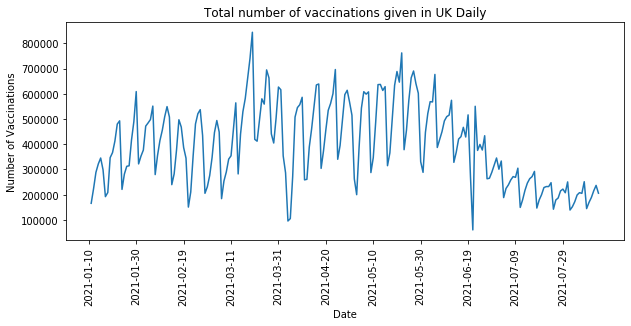

In [6]:
plt.figure(figsize=(10,4)) 
plt.plot(VD.date, VD.Total_Daily_Vaccinations)
plt.xticks(rotation=90)
plt.xticks(np.arange(0,217, step=20))
plt.title('Total number of vaccinations given in UK Daily')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.show()

In [7]:
from matplotlib import pyplot as plty

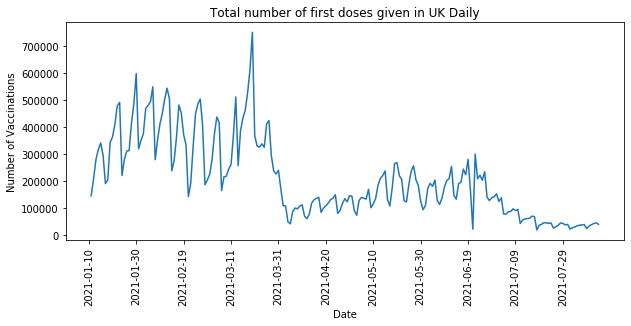

In [8]:
plty.figure(figsize=(10,4)) 
plty.plot(VD.date, VD.First_Dose_Daily)
plty.xticks(rotation=90)
plty.xticks(np.arange(0,217, step=20))
plty.title('Total number of first doses given in UK Daily')
plty.xlabel('Date')
plty.ylabel('Number of Vaccinations')
plty.show()

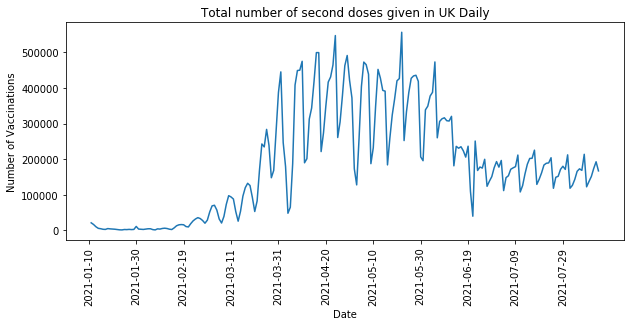

In [9]:
plt.figure(figsize=(10,4)) 
plt.plot(VD.date, VD.Second_Dose_Daily)
plt.xticks(rotation=90)
plt.xticks(np.arange(0,217, step=20))
plt.title('Total number of second doses given in UK Daily')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.show()

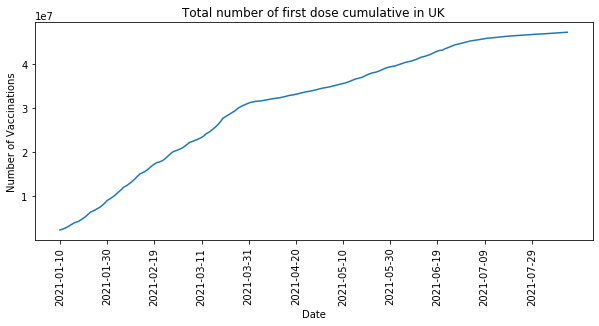

In [10]:
plt.figure(figsize=(10,4)) 
plt.plot(VD.date, VD.First_Dose_Cumulative_Total)
plt.xticks(rotation=90)
plt.xticks(np.arange(0,217, step=20))
plt.title('Total number of first dose cumulative in UK')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.show()

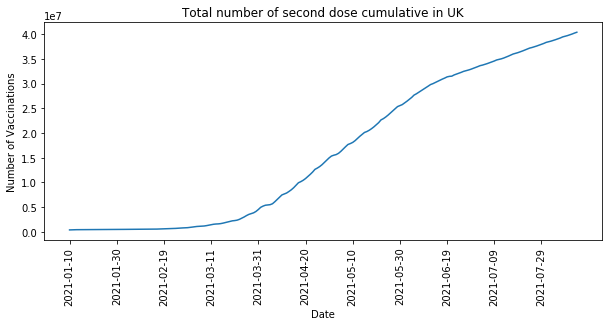

In [11]:
plt.figure(figsize=(10,4)) 
plt.plot(VD.date, VD.Second_Dose_Cumulative_Total)
plt.xticks(rotation=90)
plt.xticks(np.arange(0,217, step=20))
plt.title('Total number of second dose cumulative in UK')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.show()

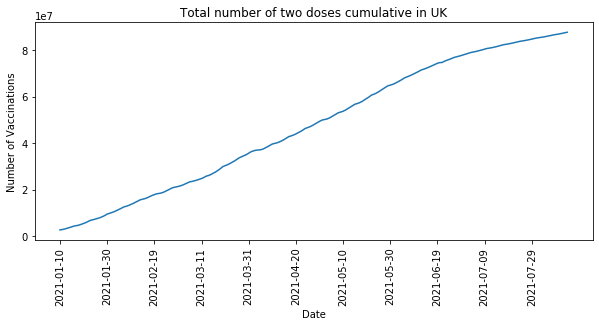

In [12]:
plt.figure(figsize=(10,4)) 
plt.plot(VD.date, VD.Cumulative_Total)
plt.xticks(rotation=90)
plt.xticks(np.arange(0,217, step=20))
plt.title('Total number of two doses cumulative in UK')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.show()

In [13]:
VD_Cum = VD.loc[:,['Cumulative_Total','date']]
VD_Cum.head(100)

,Cumulative_Total,date
215,2677971,2021-01-10
214,2843815,2021-01-11
213,3067541,2021-01-12
212,3356229,2021-01-13
211,3678180,2021-01-14
...,...,...
120,41505768,2021-04-15
119,42140989,2021-04-16
118,42780069,2021-04-17
117,43084487,2021-04-18


In [14]:
VD_Cum['date'] = pd.to_datetime(VD_Cum['date'], utc=True)

In [15]:
VD_Cum["t"] = (VD_Cum['date'] - VD_Cum.date.iloc[1]).dt.days + 1

In [17]:
VD_Cum["t_squared"] = VD_Cum["t"]* VD_Cum["t"]
VD_Cum["log"] = np.log(VD_Cum["t"])
VD_Cum["exp"] = np.log(VD_Cum["Cumulative_Total"])
VD_Cum["sqrt"] = np.sqrt(VD_Cum["t"])

In [18]:
Train = VD_Cum.iloc[0:int(np.floor(0.8*len(VD_Cum))),:]
Test = VD_Cum.iloc[int(np.floor(0.8*len(VD_Cum))):,:]

In [19]:
# Linear model
linear_model = smf.ols('Cumulative_Total ~ t', data=Train).fit()
lin_prd =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
lin_rmse = np.sqrt(np.mean((np.array(Test['Cumulative_Total'])-np.array(lin_prd))**2))

# Exponential model
Exp = smf.ols('exp ~ t', data=Train).fit()
Exp_prd = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
Exp_rmse = np.sqrt(np.mean((np.array(Test['Cumulative_Total'])-np.array(np.exp(Exp_prd)))**2))

# Quadratic model
Quad = smf.ols('Cumulative_Total ~ t + t_squared',data=Train).fit()
Quad_prd = pd.Series(Quad.predict(Test[["t","t_squared"]]))
Quad_rmse = np.sqrt(np.mean((np.array(Test['Cumulative_Total'])-np.array(Quad_prd))**2))


In [20]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([lin_rmse,Exp_rmse,Quad_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,5.901845e+06
1,rmse_Exp,9.232173e+07
2,rmse_Quad,1.050033e+07


In [21]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Cumulative_Total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.866e+04
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          9.06e-218
Time:                        13:17:37   Log-Likelihood:                -2655.6
No. Observations:                 172   AIC:                             5315.
Df Residuals:                     170   BIC:                             5321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.444e+05   1.87e+05     -3.438      0.001   -1.01e+06   -2.74e+05
t           4.592e+05   1895.893    242.204      0.000    4.55e+05    4.63e+05
==============================================================================
Omnibus:                        9.975   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                5.467
Skew:                           0.242   Prob(JB):                       0.0650
Kurtosis:                       2.273   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using this model, Iam now trying to estimate the number of vaccines requiredfor 90 percent of UK population.UK Population - 66.65 million(2019 statistics)
For 90 percent population, 66.65m*90% --> 60m population needs to get vaccinated
2 doses for each person, hence the total number of vaccinations should > 120m

In [23]:
t_data = pd.Series(list(range(VD_Cum.t.iloc[-1] + 1, VD_Cum.t.iloc[-1] + 150)))

t_squared_data = t_data*t_data

x_prd = pd.DataFrame({'t':t_data, 't_squared':t_squared_data})

In [24]:

y_prd = linear_model.predict(x_prd)
days_after = (y_prd > 120000000).idxmax() + 1 # to offset the first index of 0
Future_date = VD_Cum.iloc[-1].date + dt.timedelta(days=int(days_after))

print("The future date that UK will be able to achieve the succesful administration of vaccines to 90% of popoulation", Future_date)


The future date that UK will be able to achieve the succesful administration of vaccines to 90% of popoulation 2021-09-30 00:00:00+00:00


In [25]:
y_prd.index = pd.to_datetime(y_prd.index + 1, unit='D',origin=pd.Timestamp(VD.iloc[-1].date))

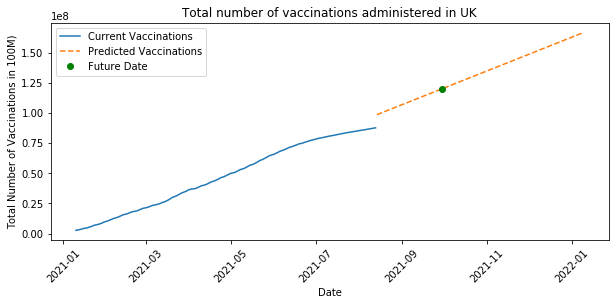

In [27]:
plt.figure(figsize=(10, 4)) 
plt.plot(VD_Cum.date, VD_Cum.Cumulative_Total, label="Current Vaccinations")
plt.plot(y_prd.index, y_prd,'--', label="Predicted Vaccinations")
plt.plot(Future_date,y_prd[Future_date], 'go', label="Future Date")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title('Total number of vaccinations administered in UK')
plt.xlabel('Date')
plt.ylabel('Total Number of Vaccinations in 100M)')
plt.show()